In [3]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
cosmo3 = Class()
params3 = {
    'output': 'tCl lCl',
    'l_max_scalars': 3000,
    'lensing': 'yes',
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.67,
    'omega_b': 0.025068}
cosmo3.set(params3)
cosmo3.compute()

In [66]:
cosmo2 = Class()
params2 = {
    'output': 'tCl lCl',
    'l_max_scalars': 3000,
    'lensing': 'yes',
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.67,
    'omega_b': 0.022068}
cosmo2.set(params2)
cosmo2.compute()

In [67]:
cosmo = Class()
params = {
    'output': 'tCl lCl',
    'l_max_scalars': 3000,
    'lensing': 'yes',
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.67,
    'omega_b': 0.020068}
cosmo.set(params)
cosmo.compute()

In [72]:
l = np.array(range(2,3*10**3 + 1))
factor = l*(l+1)/(2*np.pi)
lensed_cl = cosmo.lensed_cl(3*10**3)
lensed_cl2 = cosmo2.lensed_cl(3*10**3)
lensed_cl3 = cosmo3.lensed_cl(3*10**3)



#lensed_cl.viewkeys()

In [73]:
%matplotlib widget
plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:],
           l,factor*10**(12)*lensed_cl2['tt'][2:],
           l,factor*10**(12)*lensed_cl3['tt'][2:] )
plt.legend(['\Omega_b = 0.022', 'Omega_b = 0.024', 'Omega_b = 0.025'])
plt.grid(True, which="both", ls="-", color='0.65')
#plt.loglog(l,factor*10**(12)*lensed_cl['tt'][2:], l,factor*10**(12)*lensed_cl2['tt'][2:] )
#plt.loglog(l,factor*10**(12)*lensed_cl_nonstd['tt'][2:] )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

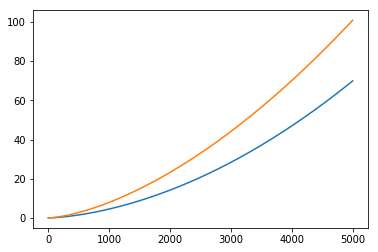

In [6]:
zlist = np.arange(0,5000)
plt.plot(zlist,[cosmo.Hubble(z) for z in zlist],zlist,[cosmo2.Hubble(z) for z in zlist])

In [7]:
cosmo2.Omega_Lambda()

0.35541995420479056

In [8]:
cosmo.age()

13.854659049394995

In [50]:
zlist = np.arange(0,11000)
np.save("LCDM-H-From-CLASS", np.array([cosmo.Hubble(z) for z in zlist]))

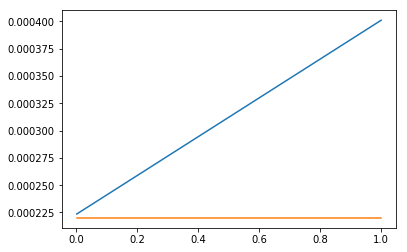

In [49]:
zlist = np.arange(0.001,2)
plt.plot(zlist,[cosmo.Hubble(z) for z in zlist],zlist, [0.00022 for z in zlist])

In [9]:
bgcosmo = cosmo.get_background()
bgcosmo.viewkeys()

dict_keys(['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', '(.)p_tot', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', '(.)rho_tot', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ur', '(.)p_tot_prime'])

In [11]:
zlist = bgcosmo['z']
#zzlist = zlist[0:zlist.size-1]
#aalist = 1/(zzlist +1)
#alist = np.append(aalist,1)
alist = 1/(zlist + 1)

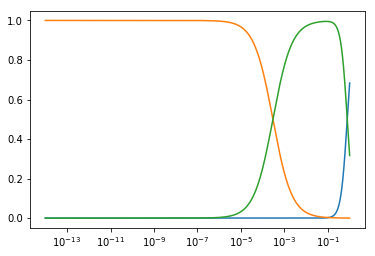

In [18]:
plt.semilogx(alist, bgcosmo['(.)rho_lambda']/bgcosmo['(.)rho_crit'],
             alist, (bgcosmo['(.)rho_ur']+bgcosmo['(.)rho_g'])/bgcosmo['(.)rho_crit'],
            alist, (bgcosmo['(.)rho_cdm'] +bgcosmo['(.)rho_b'])/bgcosmo['(.)rho_crit'])

In [34]:
cosmo.struct_cleanup()
cosmo.empty()
cosmo2.struct_cleanup()
cosmo2.empty()
cosmo3.struct_cleanup()
cosmo2.empty()



In [9]:
cosmo.Hubble(0)

0.00022348794378276187